# Teste 5b

Beatriz Evelbauer Simões 

Queremos 

In [1]:
using Plots, Distributions, Random
theme(:ggplot2)
rng = MersenneTwister(1234)

MersenneTwister(1234)

In [9]:
# definindo funções para simulação
function WienerToBridge(N)
    Wt = Vector(undef,N+1)
    Bt = Vector(undef,N+1)
    Wt[1] = 0
    Δt = 1/N
    for i ∈ 1:N 
        step = randn(rng) * √Δt # novo incremento
        Wt[i+1] = Wt[i] + step
    end
    # agora passando para a ponte
    t = [j*Δt for j ∈ 1:N+1]
    Bt .= Wt .- t .* Wt[N+1] #W1
    Bt[1] = 0 
    Bt[N+1] = 0

    return Bt
end

function PonteBrowniana(a,b,t0,t1,N)
    # primeiro calcular a ponte entre 0 e 1
    Bt_tilde = WienerToBridge(N)
    Δt = (t1-t0)/N
    t = [j*Δt for j ∈ 0:N]
    Bt = Bt_tilde .+ (a.*(t1 .- t))./(t1 - t0) .+ (b.*(t .- t0))./(t1 - t0)

    return Bt
end

function VarBridge(a,b,t,t0,t1)
    t_aux = (t - t0)/(t1 - t0)
    return t_aux - t_aux^2
end

function BridgeSim(a,b,t0,t1,N,M, plot_sim = true, include_mean = true, include_var = false, sample_mean = true, sample_sd = false)
    Ws = Vector(undef,M)
    Δt = (t1 - t0)/N
    ts = [i*Δt for i in 0:N]
    for i ∈ 1:M 
        Wt = PonteBrowniana(a,b,t0,t1,N)
        Ws[i] = Wt
    end

    if plot_sim 
        print("plot")
        p = plot(ts, Ws, title = "Ponte Browniana (\$a = \$$a, \$b=\$$b, \$ t_0 = \$$t0, \$t_1 =\$$t1)", label = "", color = 1)
        if include_mean
            plot!([t0, t1], [Ws[1][1], Ws[M][N+1]], color = "black", seriestype = :straightline, label = "média analítica")
        end
        if include_var 
            # colocar formula da variância e plotar 
        end
        if sample_mean 
            Wt_mean = [mean(Ws[i]) for i in 1:M]
            plot!([t0,t1] + Wt_mean,[Ws[1][1], Ws[M][N+1]] + Wt_mean, linestyle = :dash, label = "Média Amostral")
            if sample_sd
                Wt_sd = [std(Ws[i]) for i in 1:M]
                σ_upper = Wt_mean .+ 3 .* Wt_sd 
                σ_low = Wt_mean .- 3 .* Wt_sd
                hline!(σ_upper, linestyle = :dash, label = "")
                hline!(σ_low, linestyle = :dash, label = "")
            end
        end 
    end
    return p 
end

BridgeSim (generic function with 6 methods)

### Teste do caso base

In [13]:
a = b = 0
t0 = 0 
t1 = 1
N = 100
M = 10

10

plot

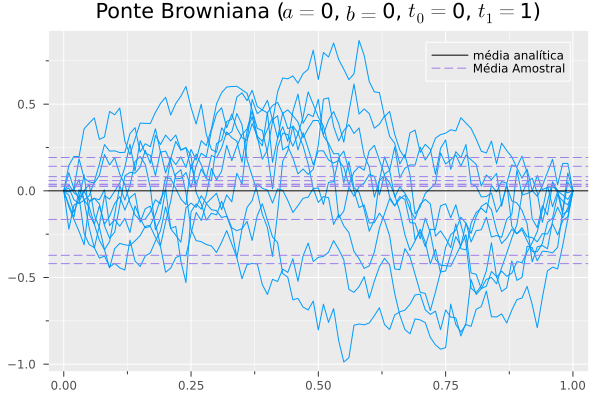

In [14]:
BridgeSim(a,b,t0,t1,N,M)

### Testando outros parâmetros

In [15]:
a = -1 
b = 2
t0 = 0 
t1 = 5
N = 100
M = 10

10

plot

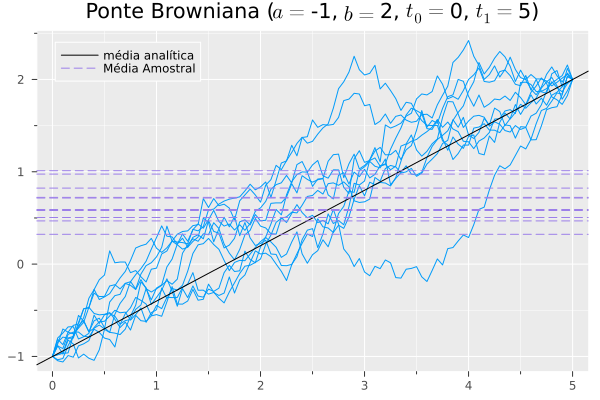

In [16]:
BridgeSim(a,b,t0,t1,N,M)